
MCM 2021
Murder Hornets

In [9]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [10]:
df = pd.read_csv('/Users/allisonliu/Desktop/MCM2021/data/2021_MCM_Problem_C_Data/2021MCMProblemC_DataSet.csv')
# df_images = pd.read_csv('/Users/allisonliu/Desktop/MCM2021/data/2021_MCM_Problem_C_Data/2021MCM_ProblemC_ Images_by_GlobalID.csv')
    
df_positive = df.loc[df['Lab Status'] == 'Positive ID']
df_negative = df.loc[df['Lab Status'] == 'Negative ID']
df_unprocessed = df.loc[df['Lab Status'] == 'Unprocessed']

num_pos = len(df_positive)
num_neg = len(df_negative)
num_unproc = len(df_unprocessed)

In [11]:
df_positive.columns

Index(['GlobalID', 'Detection Date', 'Notes', 'Lab Status', 'Lab Comments',
       'Submission Date', 'Latitude', 'Longitude'],
      dtype='object')

In [12]:
# df_positive['Notes']
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count_vect = CountVectorizer()
#POSITIVE
X_train_pos_counts = count_vect.fit_transform(df_positive['Notes']) #create feature vector
X_train_pos_counts.shape

# tfidf_transformer = TfidfTransformer()
# X_train_pos_tfidf = tfidf_transformer.fit_transform(X_train_pos_counts)
# X_train_pos_tfidf.shape #[n_samples, n_features]

# #NEGATIVE
X_train_neg_counts = count_vect.fit_transform(df_negative['Notes']) #create feature vector
X_train_neg_counts.shape

# tfidf_transformer = TfidfTransformer() #term frequency times inverse document frequency
# X_train_neg_tfidf = tfidf_transformer.fit_transform(X_train_neg_counts) # weight statements equally, less weight to common words
# X_train_neg_tfidf.shape #(n_samples, n_features)

#ALL TRAINING
X_train_counts = count_vect.fit_transform(df['Notes']) #create feature vector
X_train_counts.shape

tfidf_transformer = TfidfTransformer() #term frequency times inverse document frequency
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts) # weight statements equally, less weight to common words
X_train_tfidf.shape #(n_samples, n_features)

(4440, 5620)

In [13]:
# print(X_train_pos_counts)
# print(X_train_neg_counts)

In [14]:
df_train['Lab Status']

0       Positive ID
1       Positive ID
3       Positive ID
6       Negative ID
8       Negative ID
           ...     
4412    Negative ID
4419    Negative ID
4420    Negative ID
4421    Negative ID
4423    Negative ID
Name: Lab Status, Length: 2083, dtype: object

In [15]:
df_temp = (df[df['Lab Status']!='Unprocessed'])
df_train = df_temp[df_temp['Lab Status'] != 'Unverified'] #No unprocessed or unverified data
# print(df_train)

In [20]:
from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB().fit(X_train_tfidf, df['Lab Status']) #NBclassifier

#Build a pipeline
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())
                    ])
text_clf = text_clf.fit(df_train['Notes'], df_train['Lab Status'])

In [21]:
predicted= text_clf.predict(df_train['Notes'])
np.mean(predicted == df_train['Lab Status'])

0.9932789246279404

In [22]:
>>> from sklearn.linear_model import SGDClassifier
>>> text_clf_svm = Pipeline([('vect', CountVectorizer(stop_words='english')),
...                      ('tfidf', TfidfTransformer()),
...                      ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
...                                            alpha=1e-3, max_iter=10, random_state=42)),
... ])
text_clf_svm = text_clf_svm.fit(df_train['Notes'], df_train['Lab Status'])

In [23]:

predicted_svm = text_clf_svm.predict(df_train['Notes'])
print(predicted_svm.shape)
percent_correct = np.mean(predicted_svm == df_train['Lab Status'])
print(percent_correct)


(2083,)
0.9932789246279404


[-0.77593618 -0.73095734 -0.60337299 ... -1.07409041 -1.12416086
 -1.0262919 ]


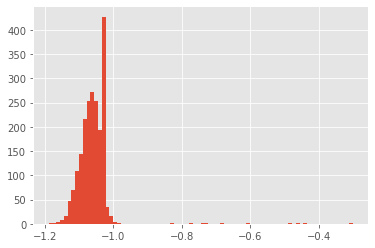

In [24]:
confidence = text_clf_svm.decision_function(df_train['Notes'])
print(confidence)
plt.hist(confidence, bins=80)
plt.show()

In [25]:
len(df_train)

2083

In [26]:
plt.plot(np.linspace(len()), confidence)

TypeError: len() takes exactly one argument (0 given)